In [94]:
## Imports for all Librarys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Imports Data Visualisatio
from matplotlib import pyplot as plt
import seaborn as sns
# Imports for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
# Load scikit-learn models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_iris
iris = load_iris()

In [95]:
df = pd.read_csv("CropRecommendation.csv")

In [96]:
# Remove crops (label) from data for splitting
y = df['label']
x = df.drop(['label'], axis = 1)

# Split data 70/30 for ML
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

print("Dataset Count for Training: ", len(X_train))
print("Dataset Count for Testing: ", len(X_test))

Dataset Count for Training:  1540
Dataset Count for Testing:  660


In [97]:
NBC_Model = GaussianNB() #https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

NBC_fitted = NBC_Model.fit(X_train, Y_train)
Y_prediction_NBC = NBC_fitted.predict(X_test)
score = accuracy_score(Y_test, Y_prediction_NBC)
score_percent = score * 100
print("Naive Baies Classifier: ", 'Accuracy score: %.3f' % score_percent, "%")

Naive Baies Classifier:  Accuracy score: 99.545 %


In [98]:
RFC_Model = RandomForestClassifier()
# https://www.datacamp.com/community/tutorials/random-forests-classifier-python

RFC_Model = RFC_Model.fit(X_train, Y_train)
Y_prediction_RFC = RFC_Model.predict(X_test)
score = accuracy_score(Y_test, Y_prediction_RFC)
score_percent = score * 100
print("Naive Baies Classifier: ", 'Accuracy score: %.3f' % score_percent, "%")

Naive Baies Classifier:  Accuracy score: 99.545 %


IndexError: index 8 is out of bounds for axis 0 with size 3

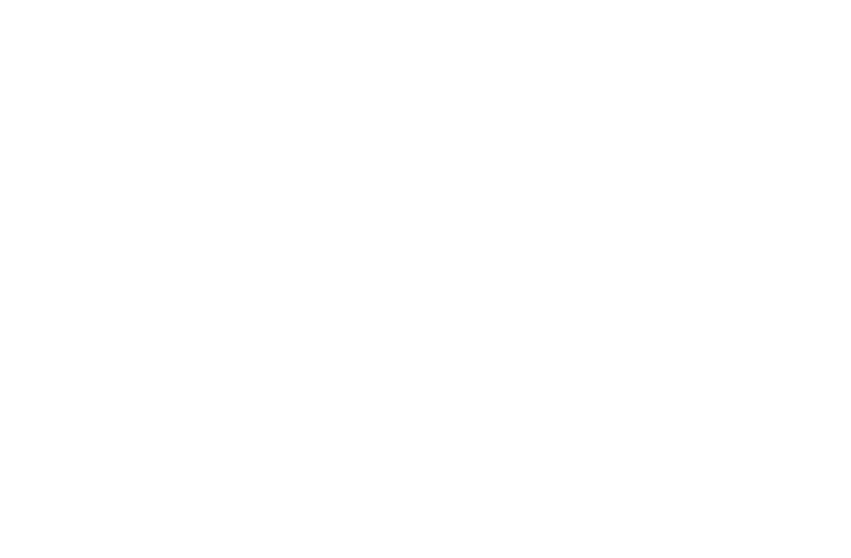

In [113]:
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(RFC_Model.estimators_[0],
          feature_names=wine.feature_names,
          class_names=wine.target_names,
          filled=True, impurity=True,
          rounded=True)

# https://towardsdatascience.com/4-ways-to-visualize-individual-decision-trees-in-a-random-forest-7a9beda1d1b7